<a href="https://colab.research.google.com/github/IlarjaL/CIS9655/blob/trial/World_Happiness_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Contents
* [Part 0: Clean up the raw data](#part-0)
* [Part 1: Financially ](#part-1)
* [Part 2: Where are the happiest countries located?](#part-2)
* [Part 3: Where are the least countries located?](#part-3)
* [Part 4: Is United States a happy country?](#part-4)


Reference 
Useful notebooks
https://github.com/Alvin1359/world-happiness-report/blob/main/Final_Data_Analysis.ipynb
https://github.com/RoyMachineLearning/World-Happiness-Report/blob/master/data-visualization-tools-seaborn-and-plotly.ipynb
https://github.com/tejalkotkar/World-Happiness-Report/blob/main/WorldHappiness.ipynb
https://github.com/nateofspades/The-World-Happiness-Report-An-Exploratory-Data-Analysis-Project/blob/master/WorldHappinessReportEDA.ipynb


<a name="part-0"></a>
# Part 0: Cleaning up raw data

In [115]:
# Part 1: Load Data

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [116]:
#Loading data, reading in files
df_15 = pd.read_csv('https://raw.githubusercontent.com/IlarjaL/CIS9655/main/data/2015.csv')
df_16 = pd.read_csv('https://raw.githubusercontent.com/IlarjaL/CIS9655/main/data/2016.csv')
df_17 = pd.read_csv('https://raw.githubusercontent.com/IlarjaL/CIS9655/main/data/2017.csv')
df_18 = pd.read_csv('https://raw.githubusercontent.com/IlarjaL/CIS9655/main/data/2018.csv')
df_19 = pd.read_csv('https://raw.githubusercontent.com/IlarjaL/CIS9655/main/data/2019.csv')
df_20 = pd.read_csv('https://raw.githubusercontent.com/IlarjaL/CIS9655/main/data/2020.csv')
df_21 = pd.read_csv('https://raw.githubusercontent.com/IlarjaL/CIS9655/main/data/2021.csv')

In [117]:
# to be delete?
#Dropping N/A values for 2015 
#df_15 = df_15.dropna()

In [118]:
# to be delete?
#Checking there are no null values
#df_15.info()

In [119]:
# to be delete?
#Dropping N/A values for 2016
# df_16 = df_16.dropna()

In [120]:
# to be delete?
#Checking there are no null values
#df_16.info()

In [121]:
# to be delete?
#Dropping N/A values for 2017
#df_17 = df_17.dropna()

In [122]:
# to be delete?
#Checking there are no null values
# df_17.info()

In [123]:
# to be delete?
#Dropping N/A values for 2018
#df_18 = df_18.dropna()

In [124]:
# to be delete?
#Checking there are no null values
#df_18.info()

In [125]:
# to be delete?
#Dropping N/A values for 2019
#df_19 = df_19.dropna()

In [126]:
# to be delete?
#Checking there are no null values
#df_19.info()

In [127]:
# to be delete?
#Dropping N/A values for 2020
#df_20 = df_20.dropna()

In [128]:
# to be delete?
#Checking there are no null values
#df_20.info()

In [129]:
# to be delete?
#Dropping N/A values for 2021
#df_21 = df_21.dropna()

In [130]:
# to be delete?
#Checking there are no null values
#df_21.info()

In [131]:
#Removing unnecessary columns 
df_16 = df_16.drop(columns = ['Lower Confidence Interval', 'Upper Confidence Interval'])
df_16.head(5)

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [132]:
#Removing unnecessary columns
df_21 = df_21.drop(columns = ['Standard error of ladder score', 'upperwhisker', 'lowerwhisker', 'Ladder score in Dystopia', 'Dystopia + residual', 'Explained by: Log GDP per capita', 'Explained by: Social support', 'Explained by: Healthy life expectancy', 'Explained by: Freedom to make life choices', 'Explained by: Generosity', 'Explained by: Perceptions of corruption'])
df_21.head(5)

,Country name,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,Western Europe,7.842,10.775,0.954,72.0,0.949,-0.098,0.186
1,Denmark,Western Europe,7.620,10.933,0.954,72.7,0.946,0.030,0.179
2,Switzerland,Western Europe,7.571,11.117,0.942,74.4,0.919,0.025,0.292
3,Iceland,Western Europe,7.554,10.878,0.983,73.0,0.955,0.160,0.673
4,Netherlands,Western Europe,7.464,10.932,0.942,72.4,0.913,0.175,0.338


In [133]:
# Renaming columns to make sure the column names are consistent across the years
df_15 = df_15.rename(columns = {'Happiness Rank':'Rank', 'Happiness Score' : 'Score', 
                                      'Economy (GDP per Capita)' : 'gdp_per_capita', 'Health (Life Expectancy)' : 'Health',
                                      'Trust (Government Corruption)' : 'gov_corruption', 'Dystopia Residual' : 'Dystopia'})
df_15['Year'] = 2015

df_16 = df_16.rename(columns = {'Happiness Rank':'Rank', 'Happiness Score' : 'Score', 
                                      'Economy (GDP per Capita)' : 'gdp_per_capita', 'Health (Life Expectancy)' : 'Health',
                                      'Trust (Government Corruption)' : 'gov_corruption', 'Dystopia Residual' : 'Dystopia'})
df_16['Year'] = 2016

df_17 = df_17.rename(columns = {'Happiness.Rank':'Rank', 'Happiness.Score' : 'Score', 
                                      'Economy..GDP.per.Capita.' : 'gdp_per_capita', 'Health..Life.Expectancy.' : 'Health',
                                      'Trust..Government.Corruption.' : 'gov_corruption', 'Dystopia.Residual' : 'Dystopia'})
df_17['Year'] = 2017 
df_18 = df_18.rename(columns = {'Overall rank':'Rank', 'Country or region' : 'Country',
                                      'GDP per capita' : 'gdp_per_capita', 'Social support' : 'Family',
                                      'Healthy life expectancy' : 'Health','Freedom to make life choices' : 'Freedom',
                                      'Perceptions of corruption' : 'gov_corruption'})
df_18['Year'] = 2018

df_19 = df_19.rename(columns = {'Overall rank':'Rank', 'Country or region' : 'Country',
                                      'GDP per capita' : 'gdp_per_capita', 'Social support' : 'Family',
                                      'Healthy life expectancy' : 'Health','Freedom to make life choices' : 'Freedom'
                                     , 'Perceptions of corruption' : 'gov_corruption'})
df_19['Year'] = 2019 

df_20 = df_20.rename(columns = {'Happiness Rank': 'Rank', 'Country name' : 'Country', 'Regional indicator': 'Region', 'Ladder score' : 'Score', 
                                      'Logged GDP per capita' : 'gdp_per_capita', 'Social support' : 'Family', 'Healthy life expectancy' : 'Health',
                                      'Freedom to make life choices' : 'Freedom', 'Perceptions of corruption' : 'gov_corruption'})
df_20['Rank'] =  range(1, len(df_20.index)+1)
df_20['Year'] = 2020 


df_21 = df_21.rename(columns = {'Happiness Rank': 'Rank', 'Country name' : 'Country', 'Regional indicator': 'Region', 'Ladder score' : 'Score', 
                                      'Logged GDP per capita' : 'gdp_per_capita', 'Social support' : 'Family', 'Healthy life expectancy' : 'Health',
                                      'Freedom to make life choices' : 'Freedom', 'Perceptions of corruption' : 'gov_corruption'})
df_21['Rank'] =  range(1, len(df_21.index)+1)
df_21['Year'] = 2021


df_21.head(5)

,Country,Region,Score,gdp_per_capita,Family,Health,Freedom,Generosity,gov_corruption,Rank,Year
0,Finland,Western Europe,7.842,10.775,0.954,72.0,0.949,-0.098,0.186,1,2021
1,Denmark,Western Europe,7.620,10.933,0.954,72.7,0.946,0.030,0.179,2,2021
2,Switzerland,Western Europe,7.571,11.117,0.942,74.4,0.919,0.025,0.292,3,2021
3,Iceland,Western Europe,7.554,10.878,0.983,73.0,0.955,0.160,0.673,4,2021
4,Netherlands,Western Europe,7.464,10.932,0.942,72.4,0.913,0.175,0.338,5,2021


In [134]:
#Storing Each Data from 2015 - 2021 into New Data Frame
datarank = pd.DataFrame(columns = ['Country', 'Rank', 'Score', 'gdp_per_capita',
                                   'Family', 'Health', 'Freedom','gov_corruption',
                                   'Generosity', 'Year'])
n = [df_15, df_16, df_17, df_18, df_19, df_20, df_21]
for i in n:
    datarank = datarank.append(i[['Country', 'Rank', 'Score', 'gdp_per_capita',
                                   'Family', 'Health', 'Freedom','gov_corruption',
                                   'Generosity', 'Year']])

In [135]:
datarank

,Country,Rank,Score,gdp_per_capita,Family,Health,Freedom,gov_corruption,Generosity,Year
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015
...,...,...,...,...,...,...,...,...,...,...
144,Lesotho,145,3.512,7.92600,0.78700,48.70000,0.71500,0.91500,-0.13100,2021
145,Botswana,146,3.467,9.78200,0.78400,59.26900,0.82400,0.80100,-0.24600,2021
146,Rwanda,147,3.415,7.67600,0.55200,61.40000,0.89700,0.16700,0.06100,2021
147,Zimbabwe,148,3.145,7.94300,0.75000,56.20100,0.67700,0.82100,-0.04700,2021


<a name="part-1"></a>
# Part 3 financially? Are they rich or poor?   
YOOEUN PARK

Text(0.5, 0, 'World Happiness Rank ')

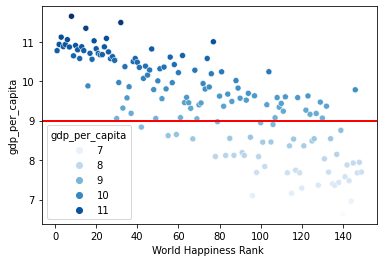

In [136]:
# We may need to add title, unit 
# also can we only look at top 10 vs last 10, now it is too small to see (saw you already did, but can you make them into one chart?)
# x = df_21.Country               # set x-axis
# y = df_21.gdp_per_capita         # set y-axis

# plt.figure(figsize=(30,10))
# plt.xticks(rotation=90)
plt.axhline(y=9, color='r', linewidth=2)
# plt.ylim(7,12)

# plt.scatter(x, y)
# plt.plot(x, y)
sns.scatterplot(x = df_21.Rank,y = df_21.gdp_per_capita, hue = df_21.gdp_per_capita,palette = "Blues")
plt.xlabel('World Happiness Rank ') 


Text(0, 0.5, 'GDP per capita')

<Figure size 432x288 with 0 Axes>

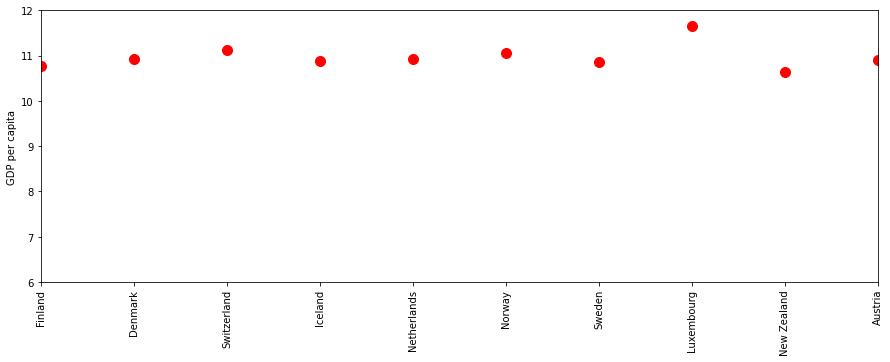

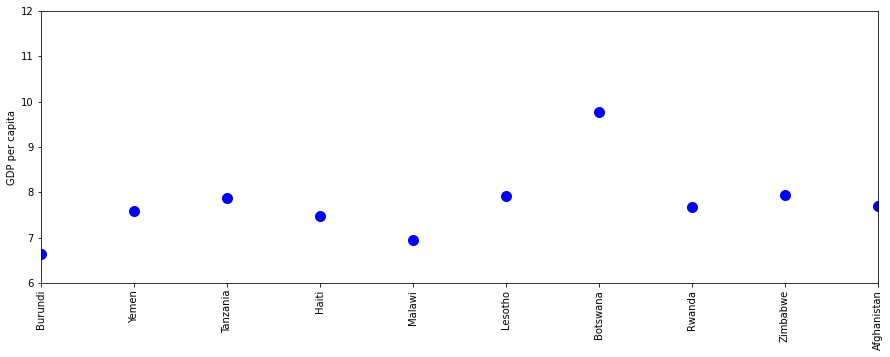

In [137]:

x = df_21.Country                # set x-axis
y = df_21.gdp_per_capita         # set y-axis
plt.figure(1)
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
plt.xlim(0,9)
plt.ylim(6,12)
plt.scatter(x, y,c='red',s=100)
plt.ylabel('GDP per capita')

plt.figure(2)
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
plt.xlim(139,148)
plt.ylim(6,12)
plt.scatter(x, y,c='blue',s=100)
plt.ylabel('GDP per capita')

The r-value is: 0.5899767727874585
The p-value is: 2.9617212615356554e-30


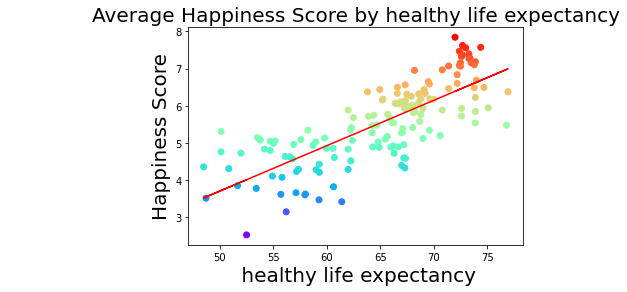

In [138]:
# * [Part 4: correlation between healthy life expectancy, social support and ranking of happiness Yooeun
import scipy.stats as st
x_values = df_21["Health"]
y_values =  df_21["Score"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values,c=df_21["Score"],cmap="rainbow")
plt.plot(x_values,regress_values,"r-")

plt.xlabel(" healthy life expectancy",size=20)
plt.ylabel("Happiness Score",size=20)
plt.title(f'Average Happiness Score by healthy life expectancy',size=20)
plt.annotate(line_eq,(30.1,5),fontsize=15,color="r")
print(f"The r-value is: {rvalue**2}")
print(f"The p-value is: {pvalue}")

plt.show()



The r-value is: 0.5728789077039032
The p-value is: 6.051516845658952e-29


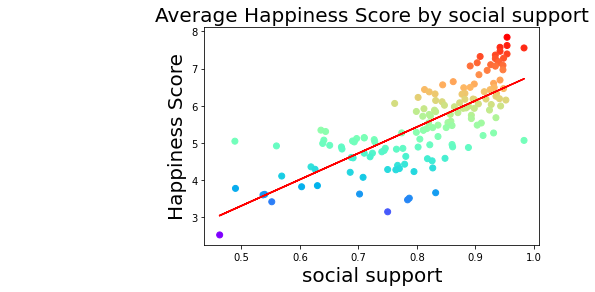

In [139]:
x_values = df_21["Family"]
y_values =  df_21["Score"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values,c=df_21["Score"],cmap='rainbow')
plt.plot(x_values,regress_values,"r-")

plt.xlabel("social support",size=20)
plt.ylabel("Happiness Score",size=20)
plt.title(f'Average Happiness Score by social support',size=20)
plt.annotate(line_eq,(0.1,7),fontsize=15,color="r")
print(f"The r-value is: {rvalue**2}")
print(f"The p-value is: {pvalue}")

plt.show()


<a name="part-2"></a>
# Part 2 Where are the happiest countries located?

In [140]:
import json

In [141]:
#Uploading geojson file to create maps with statistical information
path = 'https://raw.githubusercontent.com/IlarjaL/CIS9655/f2813cb5843c6ab1a0ee4ee431434e34d915d53c/countries.geojson'
states = pd.read_json(path)

In [142]:
#Creating a mapping for the states in between the source file and the geojson
state_id_map = {}
for feature in states['features']:
  feature['id'] = feature['properties']['ISO_A3']
  state_id_map[feature['properties']['ADMIN']] = feature['id']

In [143]:
states['features'][1]['properties']

{'ADMIN': 'Afghanistan', 'ISO_A3': 'AFG'}

In [144]:
#Replacing namin conventions for some states to overcome differences between the two data sources
datarank['Country'].replace(['United States', 'Trinidad & Tobago', 'Serbia', 'Hong Kong', 'North Macedonia', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Palestinian Territories', 'Tanzania', 'North Cyprus', 'Somaliland region', 'Somaliland Region', 'Taiwan Province of China', 'Hong Kong S.A.R., China', 'Hong Kong S.A.R. of China'], 
                      ['United States of America', 'Trinidad and Tobago', 'Republic of Serbia', 'Hong Kong S.A.R.', 'Macedonia', 'Democratic Republic of the Congo', 'Republic of Congo', 'Palestine', 'United Republic of Tanzania', 'Northern Cyprus', 'Somaliland', 'Somaliland', 'Taiwan', 'Hong Kong S.A.R.', 'Hong Kong S.A.R.'], inplace=True)

In [145]:
#Creating new id column
datarank['id'] = datarank['Country'].apply(lambda x: state_id_map[x])

In [146]:
import plotly.express as px

In [147]:
datarank_21 = datarank[datarank.Year.eq(2021)]
datarank_21

,Country,Rank,Score,gdp_per_capita,Family,Health,Freedom,gov_corruption,Generosity,Year,id
0,Finland,1,7.842,10.775,0.954,72.000,0.949,0.186,-0.098,2021,FIN
1,Denmark,2,7.620,10.933,0.954,72.700,0.946,0.179,0.030,2021,DNK
2,Switzerland,3,7.571,11.117,0.942,74.400,0.919,0.292,0.025,2021,CHE
3,Iceland,4,7.554,10.878,0.983,73.000,0.955,0.673,0.160,2021,ISL
4,Netherlands,5,7.464,10.932,0.942,72.400,0.913,0.338,0.175,2021,NLD
...,...,...,...,...,...,...,...,...,...,...,...
144,Lesotho,145,3.512,7.926,0.787,48.700,0.715,0.915,-0.131,2021,LSO
145,Botswana,146,3.467,9.782,0.784,59.269,0.824,0.801,-0.246,2021,BWA
146,Rwanda,147,3.415,7.676,0.552,61.400,0.897,0.167,0.061,2021,RWA
147,Zimbabwe,148,3.145,7.943,0.750,56.201,0.677,0.821,-0.047,2021,ZWE


In [148]:
#Mapping out the happiness score for 2021
fig = px.choropleth(datarank_21, locations ='id', color='Score', hover_name='Country', hover_data =['Rank'])
fig.update_layout(title_text="Happiness score distribution in 2021", title_x=0.5, titlefont=dict(size=20))
fig.show()

In [149]:
#Top 10 happiest countries in 2021
top10 = datarank_21.head(10)

In [150]:
fig = px.choropleth(top10, locations ='id', color='Score', hover_name='Country', hover_data =['Rank'])
fig.update_layout(title_text="Top 10 happiest countries in 2021 (during COVID-19)", title_x=0.5, titlefont=dict(size=20))
fig.show()

In [151]:
datarank_19 = datarank[datarank.Year.eq(2019)]
top10_19 = datarank_19.head(10)

In [152]:
fig = px.choropleth(top10_19, locations ='id', color='Rank', hover_name='Country', hover_data =['Rank'])
fig.update_layout(title_text="Top 10 happiest countries in 2019 (before COVID-19)", title_x=0.5, titlefont=dict(size=20))
fig.show()

In [153]:
fig1 = px.choropleth(top10, locations ='id', color='Rank', hover_name='Country', color_discrete_sequence=px.colors.qualitative.Light24)
fig2 = px.choropleth(top10_19, locations ='id', color='Rank', hover_name='Country', color_discrete_sequence=px.colors.qualitative.Light24)
fig1.show()
fig2.show()
#fig, (ax1, ax2) = plt.subplots(ncols=2)
#fig1.plot(ax = ax1)
#fig2.plot(ax = ax2)

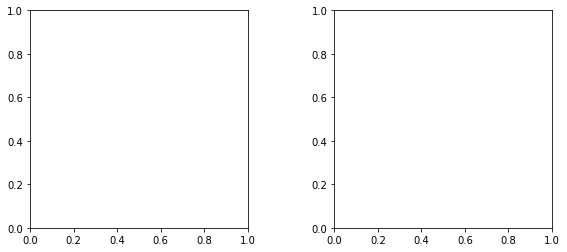

In [154]:
from plotly.subplots import make_subplots
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(10,4), subplot_kw=dict(aspect='equal'))
fig1 = px.choropleth(top10, locations ='id', color='Score', hover_name='Country')

fig2 = px.choropleth(top10_19, locations ='id', color='Score', hover_name='Country')
fig.show()
#fig1.show()
#fig2.show()


<a name="part-3"></a>
# Part 3 Where are the least happy countries in 2021? 

In [155]:
#Lower 10 countries by happiness in 2021
low10 = datarank_21.tail(10)
low10

,Country,Rank,Score,gdp_per_capita,Family,Health,Freedom,gov_corruption,Generosity,Year,id
139,Burundi,140,3.775,6.635,0.490,53.400,0.626,0.607,-0.024,2021,BDI
140,Yemen,141,3.658,7.578,0.832,57.122,0.602,0.800,-0.147,2021,YEM
141,United Republic of Tanzania,142,3.623,7.876,0.702,57.999,0.833,0.577,0.183,2021,TZA
142,Haiti,143,3.615,7.477,0.540,55.700,0.593,0.721,0.422,2021,HTI
143,Malawi,144,3.600,6.958,0.537,57.948,0.780,0.729,0.038,2021,MWI
144,Lesotho,145,3.512,7.926,0.787,48.700,0.715,0.915,-0.131,2021,LSO
145,Botswana,146,3.467,9.782,0.784,59.269,0.824,0.801,-0.246,2021,BWA
146,Rwanda,147,3.415,7.676,0.552,61.400,0.897,0.167,0.061,2021,RWA
147,Zimbabwe,148,3.145,7.943,0.750,56.201,0.677,0.821,-0.047,2021,ZWE
148,Afghanistan,149,2.523,7.695,0.463,52.493,0.382,0.924,-0.102,2021,AFG


In [156]:
fig = px.choropleth(low10, locations ='id', color='Score', hover_name='Country', hover_data =['Rank'])
fig.update_layout(title_text="10 Least happy countries in 2021", title_x=0.5, titlefont=dict(size=20))
fig.show()

In [157]:
#Lower 10 countries by happiness in 2019
low10_19 = datarank_19.tail(10)

In [158]:
fig = px.choropleth(low10_19, locations ='id', color='Score', hover_name='Country', hover_data =['Rank'])
fig.update_layout(title_text="10 Least happy countries in 2019", title_x=0.5, titlefont=dict(size=20))
fig.show()

Text(0, 0.5, 'Health Score')

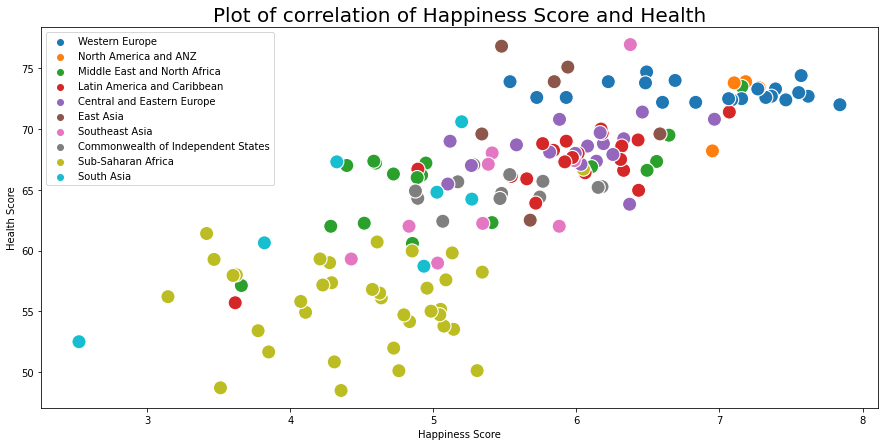

In [159]:
#Plotting correlation between happiness and GDP

plt.rcParams['figure.figsize'] = (15,7)
plt.title('Plot of correlation of Happiness Score and Health', fontsize = '20')
sns.scatterplot(x = df_21.Score, y = df_21.Health, hue = df_21.Region, s=200, markers=True);

plt.legend(loc = 'best', fontsize = '10')
plt.xlabel('Happiness Score') 
plt.ylabel('Health Score')


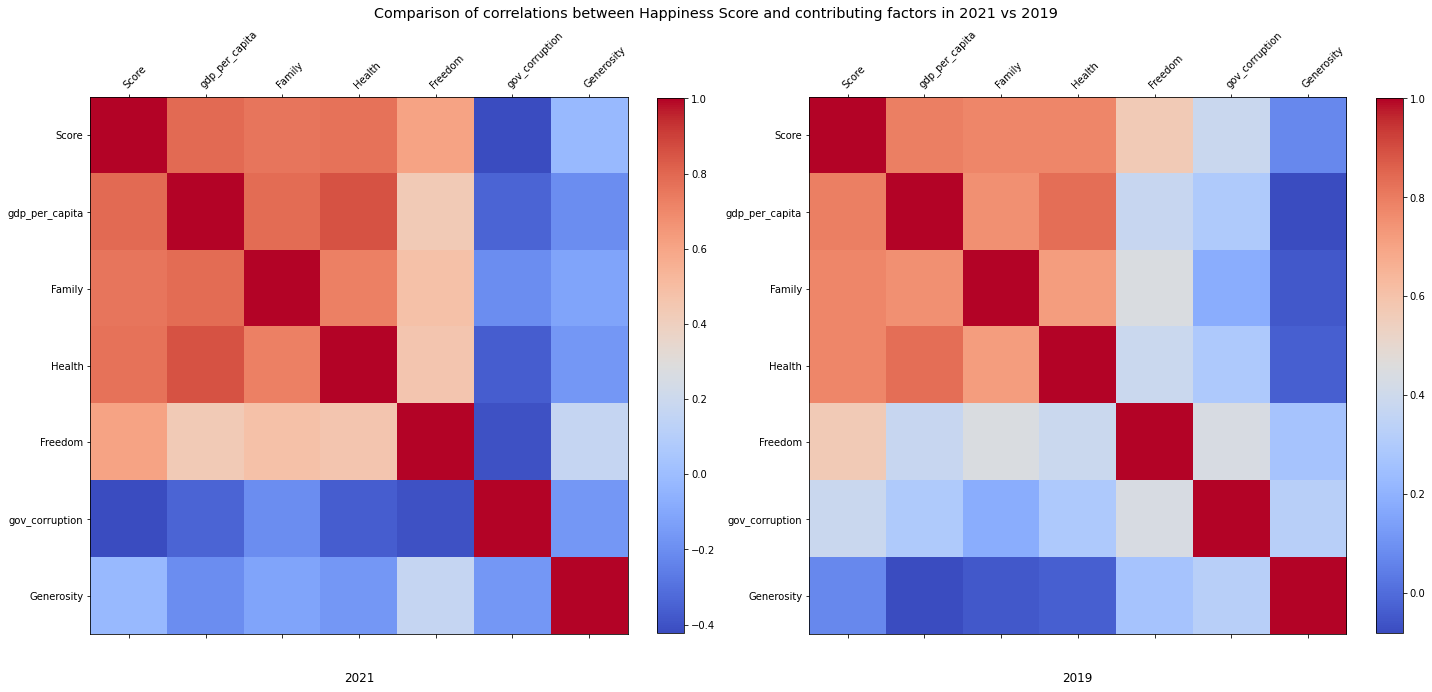

In [160]:
#Correlation Map
fig, axes = plt.subplots(ncols=2, figsize = (20,10))
ax1, ax2 = axes
cor_21 = datarank_21.corr(method = 'pearson')
cor_19 = datarank_19.corr(method = 'pearson')
col1 = cor_21.columns
col2 = cor_19.columns

im1 = ax1.matshow(cor_21, cmap = 'coolwarm')
im2 = ax2.matshow(cor_19, cmap = 'coolwarm')


# Formatting for heat map 1.
ax1.set_xticks(range(len(col1)))
ax1.set_yticks(range(len(col1)))
ax1.set_xticklabels(col1)
ax1.set_yticklabels(col1)
ax1.set_title('2021', y=-0.1)
plt.setp(ax1.get_xticklabels(), rotation=45, ha='left', rotation_mode='anchor')
plt.colorbar(im1, fraction=0.045, pad=0.05, ax=ax1)

# Formatting for heat map 2.
ax2.set_xticks(range(len(col2)))
ax2.set_yticks(range(len(col2)))
ax2.set_xticklabels(col2)
ax2.set_yticklabels(col2)
ax2.set_title('2019', y=-0.1)
plt.setp(ax2.get_xticklabels(), rotation=45, ha='left', rotation_mode='anchor')
plt.colorbar(im2, fraction=0.045, pad=0.05, ax=ax2)

st = fig.suptitle("Comparison of correlations between Happiness Score and contributing factors in 2021 vs 2019", fontsize="x-large")
fig.tight_layout()

<a name="part-4"></a>
# Part 4 Is United States a happy country

In [161]:
datarank

,Country,Rank,Score,gdp_per_capita,Family,Health,Freedom,gov_corruption,Generosity,Year,id
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015,CHE
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015,ISL
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015,DNK
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015,NOR
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015,CAN
...,...,...,...,...,...,...,...,...,...,...,...
144,Lesotho,145,3.512,7.92600,0.78700,48.70000,0.71500,0.91500,-0.13100,2021,LSO
145,Botswana,146,3.467,9.78200,0.78400,59.26900,0.82400,0.80100,-0.24600,2021,BWA
146,Rwanda,147,3.415,7.67600,0.55200,61.40000,0.89700,0.16700,0.06100,2021,RWA
147,Zimbabwe,148,3.145,7.94300,0.75000,56.20100,0.67700,0.82100,-0.04700,2021,ZWE


In [162]:
us_df = datarank.loc[(datarank['Country'] == 'United States of America')]
us_df

,Country,Rank,Score,gdp_per_capita,Family,Health,Freedom,gov_corruption,Generosity,Year,id
14,United States of America,15,7.1190,1.394510,1.247110,0.861790,0.546040,0.158900,0.401050,2015,USA
12,United States of America,13,7.1040,1.507960,1.047820,0.779000,0.481630,0.148680,0.410770,2016,USA
13,United States of America,14,6.9930,1.546259,1.419921,0.774287,0.505741,0.135639,0.392579,2017,USA
17,United States of America,18,6.8860,1.398000,1.471000,0.819000,0.547000,0.133000,0.291000,2018,USA
18,United States of America,19,6.8920,1.433000,1.457000,0.874000,0.454000,0.128000,0.280000,2019,USA
17,United States of America,18,6.9396,10.925769,0.914219,68.299500,0.842620,0.699715,0.149892,2020,USA
18,United States of America,19,6.9510,11.023000,0.920000,68.200000,0.837000,0.698000,0.098000,2021,USA


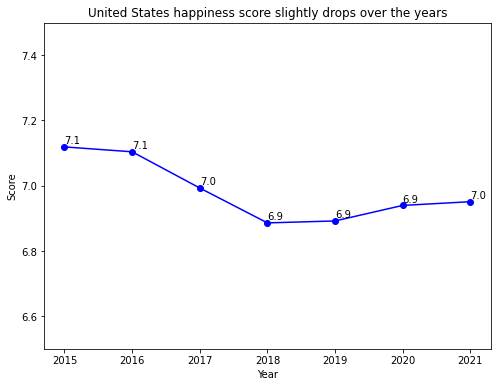

In [163]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 6)
ax.plot(us_df['Year'], us_df['Score'], color="b",  marker="o")
for a,b in zip(us_df['Year'], us_df['Score']): 
    plt.text(a, b+0.01, str(round(b, 1)))
ax.set_xlabel('Year')
ax.set_ylabel('Score')
ax.set_ylim(6.5, 7.5)
ax.set_title("United States happiness score slightly drops over the years")
  
plt.show()

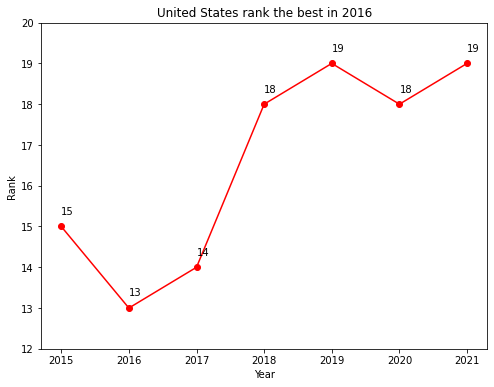

<Figure size 2160x2160 with 0 Axes>

In [164]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 6)
ax.plot(us_df['Year'], us_df['Rank'], color="r",marker="o")
for a,b in zip(us_df['Year'], us_df['Rank']): 
    plt.text(a, b+0.3, str(round(b, 1)))
ax.set_xlabel('Year')
ax.set_ylabel('Rank')
ax.set_ylim(12, 20)
ax.set_title("United States rank the best in 2016")
  
plt.figure(figsize=(30, 30))
plt.show()

In [165]:
# Compared with the happiest country, what is lagging
# Only look at Top 5 countries 
com_df = datarank.loc[(datarank['Rank'] <6)]
# Get the average for Top5 countries
top_avg = com_df.mean(axis=0).to_frame().T
top_avg['Country']="Top 5"
# Get the average for US across the years
us_avg = us_df.mean(axis=0).to_frame().T
us_avg['Country']="US"

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



In [166]:
# Concat the US and top 5 countries df
avg_df = pd.concat([top_avg, us_avg])
# Drop the rank and year column
avg_df = avg_df.drop(['Rank', 'Year'], 1)
avg_df = avg_df.set_index('Country')
avg_df = avg_df.rename(columns={'gdp_per_capita': 'GDP', 'gov_corruption': 'Corruption'})
avg_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



,Score,GDP,Family,Health,Freedom,Corruption,Generosity
Country,,,,,,,
Top 5,7.552077,4.129354,1.304925,21.467500,0.714457,0.332571,0.253735
US,6.983514,4.175500,1.211010,20.086797,0.602004,0.300276,0.289042


In [167]:
# To make the value comparable across different columns
avg_df['Score'] = avg_df['Score']/avg_df.at['US','Score']
avg_df['GDP'] = avg_df['GDP']/avg_df.at['US','GDP']
avg_df['Family'] = avg_df['Family'] /avg_df.at['US','Family']
avg_df['Freedom'] = avg_df['Freedom']/avg_df.at['US','Freedom']
avg_df['Health'] = avg_df['Health']/avg_df.at['US','Health']
avg_df['Corruption'] = avg_df['Corruption']/avg_df.at['US','Corruption']
avg_df['Generosity'] = avg_df['Generosity'] /avg_df.at['US','Generosity']

trans_df=avg_df.T
trans_df

Country,Top 5,US
Score,1.081415,1.0
GDP,0.988948,1.0
Family,1.077551,1.0
Health,1.068737,1.0
Freedom,1.186796,1.0
Corruption,1.107549,1.0
Generosity,0.877850,1.0


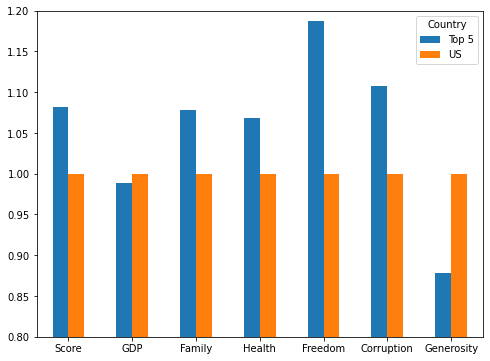

In [168]:
ax = trans_df.plot.bar(rot=0, figsize=[8, 6])
ax.set_ylim(0.8, 1.2)
plt.show()

US have a higher GDP and Generosity score, but is lacking in all other areas. 
Especially lacking in freedom.

<a name="part-5"></a>
# Part 5 Trend Analysis

In [169]:
df_15 = df_15.rename(columns={df_15.columns[2]: 'Rank_2015' })
df_15 = df_15[['Country','Rank_2015']]
df_15.head(5)

,Country,Rank_2015
0,Switzerland,1
1,Iceland,2
2,Denmark,3
3,Norway,4
4,Canada,5


In [170]:
df = pd.merge(df_19, df_15, how="inner", on='Country')
ranking = df.head(15)

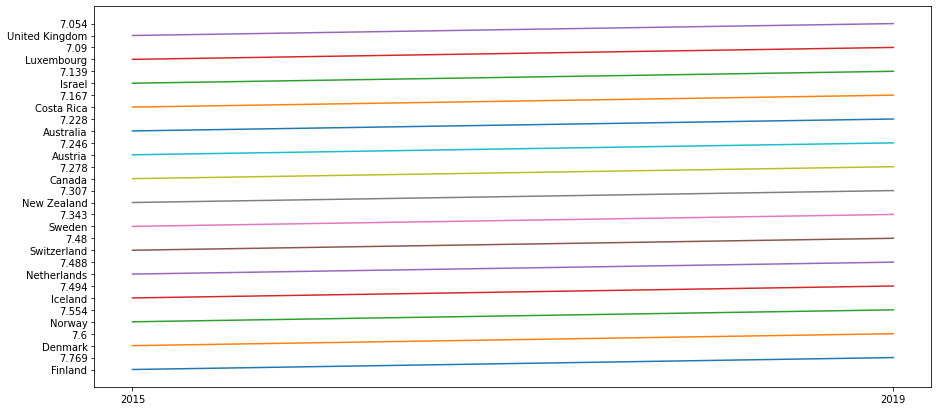

<Figure size 2160x2160 with 0 Axes>

In [171]:
x = ["2015", "2019"]
fig, ax = plt.subplots()


for (idx, row) in ranking.iterrows():
  ax.plot(x, [row[1], row[2]])
  
  
plt.figure(figsize=(30, 30))
plt.show()
